In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons,make_circles,make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV

In [26]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [27]:
## 创建分类数据，特征属性数目两个，冗余数据为0(噪音数据)，每个种类一个中心点
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

## 分布包含三个数据集(一个月牙形数据集，一个圆形，一个任意形状)
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.4, random_state=1),
            linearly_separable
            ]

In [28]:
## 算法对象构建
names = ["Nearest Neighbors", "Logistic","Decision Tree", "Random Forest", "AdaBoost", "GBDT"]
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegressionCV(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(n_estimators=10,learning_rate=1.5),
    GradientBoostingClassifier(n_estimators=10, learning_rate=1.5)
    ]

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


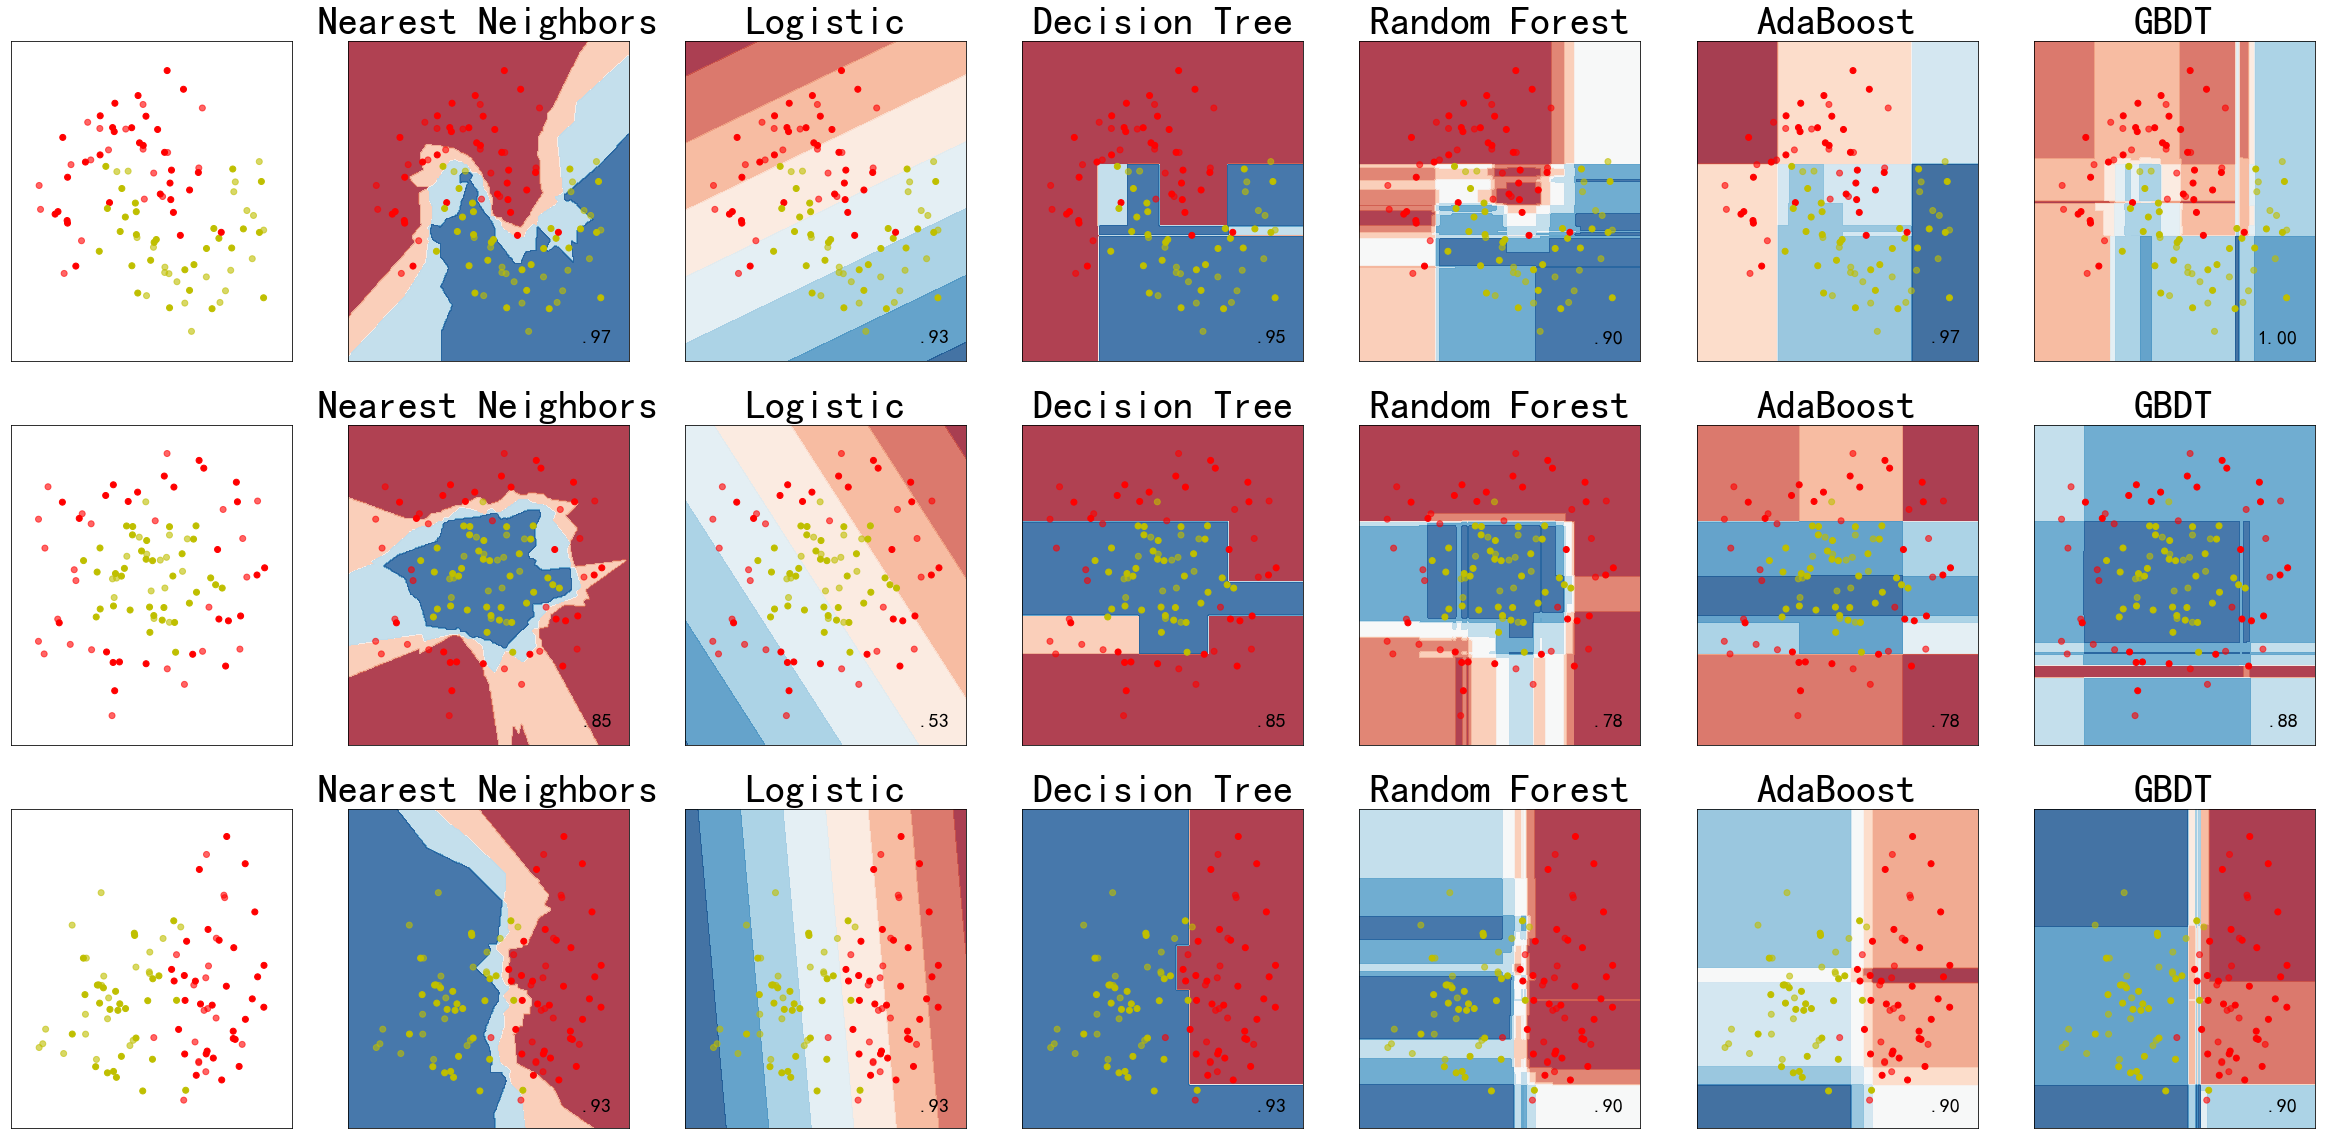

In [29]:
## 画图
figure = plt.figure(figsize=(40, 20), facecolor='w')
i = 1
h = .02  # 步长
# 对每个数据集进行给定算法计算
for ds in datasets:
    X, y = ds
    ## 归一化
    X = StandardScaler().fit_transform(X)
    ## 数据分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    ## 得到数据的最大和最下值，用于画图
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    ## 给定颜色
    # 区域颜色
    cm = plt.cm.RdBu
    # 点颜色
    cm_bright = ListedColormap(['r', 'b', 'y'])
    
    ### 原始数据图
    ## 定位子图
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ## 画点图(训练数据集)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    ## 画点图(测试数据集)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # 画每个算法的图
    for name, clf in zip(names, classifiers):
        ## 给定子图定位信息
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        ## 训练模型
        clf.fit(X_train, y_train)
        ## 计算正确率
        score = clf.score(X_test, y_test)

        # 如果有决策函数的值==>预测结果(画区域图)
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # 画区域图
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # 模型数据画点图
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # 画测试数据点
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ## 设置图标展示相关信息
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name,size=40)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=20, horizontalalignment='right')
        i += 1

## 展示图
figure.subplots_adjust(left=.1, right=.9)
plt.show()